# Data-Driven Prediction of Fe and Silica Concentrate using Machine Learning and Mean Process Conditions

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os
from sklearn.linear_model import Lasso

## Data Analysis

In [4]:
data = pd.read_csv(r"C:\Users\yesku\Downloads\B13 Iron and Silica\B13 Iron and Silica\Dataset.csv")

In [5]:
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [6]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [7]:
data.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"
737452,2017-09-09 23:00:00,"49,75","23,2","1164,12","468,019","384,801","9,61497","1,6531","300,355","292,865",...,"308,115","413,754","514,143","881,323","378,969","500,1","374,354","441,182","64,27","1,71"


In [6]:
data.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409317,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,2017-06-16 15:00:00,"64,03","6,26","2562,5","534,668","402,246","10,0591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

## Data Preprocessing

In [8]:
data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [9]:
data.shape

(737453, 24)

In [10]:
df = pd.DataFrame(data)

# Replace commas with dots
df = df.replace(',', '.', regex=True)

# Convert columns to numeric types (ignore 'date' for now)
numeric_columns = df.columns[1:]  # exclude 'date' column
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df.drop(columns=['date'], inplace=True)

print(df.dtypes)  # Check the data types of the columns

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
day                               int64
month                             int64


In [11]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,day,month,year
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,424.954,443.558,502.255,446.370,523.344,66.91,1.31,10,3,2017
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,432.939,448.086,496.363,445.922,498.075,66.91,1.31,10,3,2017
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,434.610,449.688,484.411,447.826,458.567,66.91,1.31,10,3,2017
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,442.865,446.210,471.411,437.690,427.669,66.91,1.31,10,3,2017
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,450.523,453.670,462.598,443.682,425.679,66.91,1.31,10,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,872.008,418.725,497.548,446.357,416.892,64.27,1.71,9,9,2017
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,864.409,418.377,506.398,372.995,426.337,64.27,1.71,9,9,2017
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,867.598,419.531,503.414,336.035,433.130,64.27,1.71,9,9,2017
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,876.591,407.299,502.301,340.844,433.966,64.27,1.71,9,9,2017


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [13]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'day', 'month', 'year'],
      dtype='object')

## HeatMap

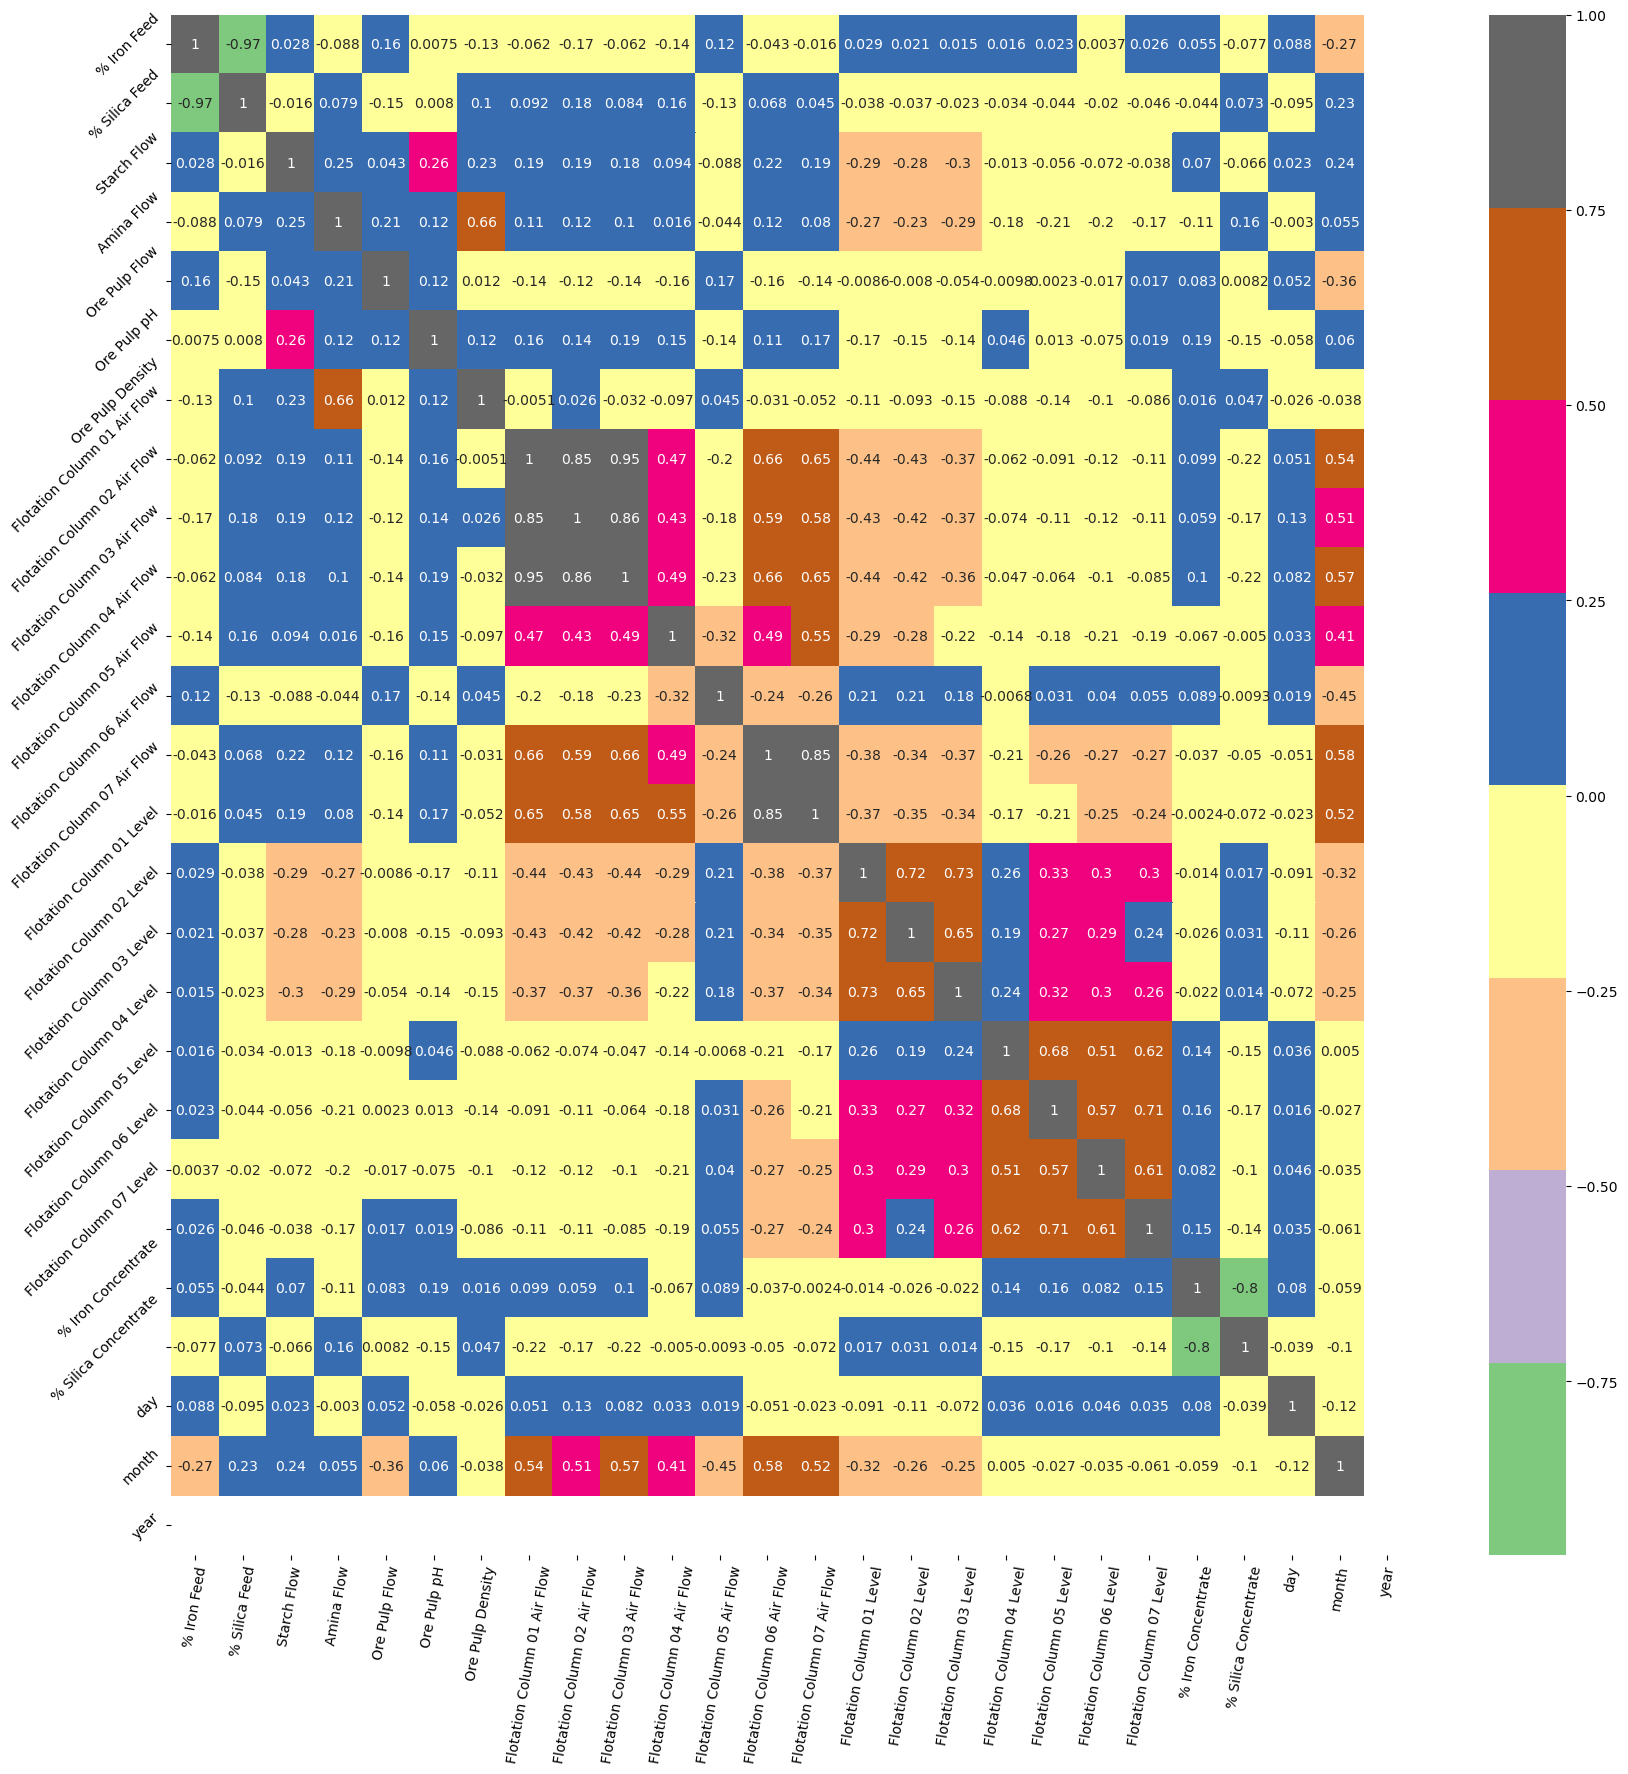

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap = 'Accent',annot = True)
plt.xticks(rotation = 80)
plt.yticks(rotation = 45)
plt.show()

In [15]:
x = df.drop(['% Iron Concentrate','% Silica Concentrate'], axis = 1)
x

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,day,month,year
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,457.396,432.962,424.954,443.558,502.255,446.370,523.344,10,3,2017
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,451.891,429.560,432.939,448.086,496.363,445.922,498.075,10,3,2017
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,451.240,468.927,434.610,449.688,484.411,447.826,458.567,10,3,2017
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,452.441,458.165,442.865,446.210,471.411,437.690,427.669,10,3,2017
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,452.441,452.900,450.523,453.670,462.598,443.682,425.679,10,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,392.160,430.702,872.008,418.725,497.548,446.357,416.892,9,9,2017
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,401.505,404.616,864.409,418.377,506.398,372.995,426.337,9,9,2017
737450,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,408.899,399.316,867.598,419.531,503.414,336.035,433.130,9,9,2017
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,405.107,466.832,876.591,407.299,502.301,340.844,433.966,9,9,2017


In [16]:
y = df[['% Iron Concentrate','% Silica Concentrate']]

In [17]:
y

,% Iron Concentrate,% Silica Concentrate
0,66.91,1.31
1,66.91,1.31
2,66.91,1.31
3,66.91,1.31
4,66.91,1.31
...,...,...
737448,64.27,1.71
737449,64.27,1.71
737450,64.27,1.71
737451,64.27,1.71


## Data Splitting

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [19]:
x_train

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,day,month,year
23233,59.09,10.44,3457.420000,518.127,403.389000,9.340970,1.70031,250.378,248.203,251.367,...,453.593,418.861,418.581,539.884000,414.247,479.242,375.083,15,3,2017
632302,52.12,21.39,3269.680000,437.931,417.079461,9.735860,1.71255,299.710,296.736,300.286,...,471.765,515.496,572.378,477.918000,613.106,567.703,286.613,16,8,2017
482508,52.33,16.95,3331.020000,392.686,391.331000,9.659040,1.69239,248.531,248.235,250.248,...,595.439,596.602,600.921,492.572000,518.644,462.983,447.901,12,7,2017
61287,56.43,13.32,603.572077,424.940,400.782000,9.380000,1.71192,252.588,249.927,249.976,...,800.504,787.180,799.795,366.705667,369.759,393.905,400.575,6,4,2017
601805,48.81,25.31,1302.036042,475.389,378.920503,9.659080,1.67078,299.032,299.605,301.695,...,537.988,532.061,612.192,369.914000,350.070,363.494,350.717,9,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,64.03,6.26,3392.500000,485.835,397.630000,10.139300,1.66726,298.552,297.821,301.396,...,452.242,434.232,437.562,400.200000,362.970,367.271,406.046,22,5,2017
365838,64.48,3.85,676.264000,565.488,395.330000,9.652550,1.68474,300.267,297.648,299.791,...,398.022,339.306,402.850,397.934000,409.372,410.725,424.524,15,6,2017
131932,55.17,14.35,1001.368837,423.757,399.142000,9.711390,1.57788,250.235,247.996,250.606,...,623.414,588.404,592.362,350.939000,329.647,328.891,300.156,22,4,2017
671155,58.26,12.88,3218.910000,529.337,380.179400,8.753917,1.71273,299.707,298.627,301.695,...,498.884,519.900,553.157,476.097000,447.639,482.616,442.915,25,8,2017


In [20]:
y_train

,% Iron Concentrate,% Silica Concentrate
23233,66.49,1.81
632302,65.79,1.14
482508,64.48,0.98
61287,65.46,2.64
601805,65.04,2.21
...,...,...
259178,65.27,3.25
365838,65.51,1.73
131932,62.13,5.11
671155,65.72,1.21


In [21]:
x_test

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,day,month,year
198870,56.65,14.83,2969.800000,474.569000,397.085000,9.62077,1.710860,249.935,250.636,248.950,...,465.618000,444.682000,444.627000,346.892000,342.489000,346.306000,332.807000,8,5,2017
18768,60.24,8.87,3751.370000,552.399000,405.806000,9.22732,1.760000,250.697,255.399,251.949,...,809.941503,451.085000,459.480000,435.234000,443.874000,428.583000,446.508000,14,3,2017
19259,60.24,8.87,3770.700000,518.311000,401.499000,9.26991,1.750000,250.455,251.752,251.873,...,462.852000,444.826000,450.737000,450.390000,470.805000,465.606000,475.089000,14,3,2017
616058,48.81,25.31,3633.310000,335.078000,378.750310,10.10850,1.673780,299.487,254.001,302.563,...,561.548000,535.820000,541.708000,532.424000,551.883000,560.056000,547.340000,12,8,2017
5905,59.89,8.98,794.536195,561.523000,400.664000,9.39431,1.760000,248.236,249.983,251.840,...,559.146000,363.291000,557.063000,517.736000,514.869000,555.328000,535.318000,11,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570827,57.46,10.80,1770.238038,382.540909,378.818391,10.05910,1.574942,300.366,255.322,302.783,...,821.984866,763.548192,862.447046,631.158394,652.013809,583.514096,611.115277,2,8,2017
124864,50.22,23.80,2000.420000,503.474000,396.925000,9.59433,1.686480,250.217,246.443,249.829,...,613.250000,598.741000,607.458000,338.573000,383.079000,397.811000,392.694000,21,4,2017
401478,49.69,26.68,822.945708,494.901000,400.375000,9.01198,1.674900,299.479,297.828,302.251,...,392.097000,383.510000,399.330000,404.764000,413.336000,234.569000,377.443000,24,6,2017
504525,58.87,9.27,1271.136250,579.130000,406.081000,10.46300,1.728470,249.900,248.071,249.310,...,537.227000,552.042000,552.476000,492.279000,446.907000,447.371000,439.686000,18,7,2017


In [22]:
y_test

,% Iron Concentrate,% Silica Concentrate
198870,63.53,3.54
18768,65.68,1.30
19259,65.61,2.08
616058,67.19,1.45
5905,65.15,2.97
...,...,...
570827,65.44,2.08
124864,65.53,2.23
401478,63.93,3.21
504525,65.64,1.17


In [23]:
x_train.shape

(516217, 24)

In [24]:
y_train.shape

(516217, 2)

## Performance Evaluation

In [25]:
a = []
b = []
c = []

def performance_metrics(algorithm, predict, testY):
    mse = mean_squared_error(testY, predict)
    mae = mean_absolute_error(testY, predict)
    r2 = r2_score(testY, predict)
    a.append(mse)
    b.append(mae)
    c.append(r2)
    print(algorithm + ' Mean Squared Error: {:.4f}'.format(mse))
    print(algorithm + ' Mean Absolute Error: {:.4f}'.format(mae))
    print(algorithm + ' R^2 Score: {:.4f}'.format(r2))

    # Plotting best-fit line
    plt.scatter(testY, predict)
    plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], '--r', lw=2)  # best-fit line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(algorithm + ' Predictions vs True Values')
    plt.show()

## XGBoost Regressor

model/XGBoost Regressor Mean Squared Error: 0.2859
model/XGBoost Regressor Mean Absolute Error: 0.3857
model/XGBoost Regressor R^2 Score: 0.7725


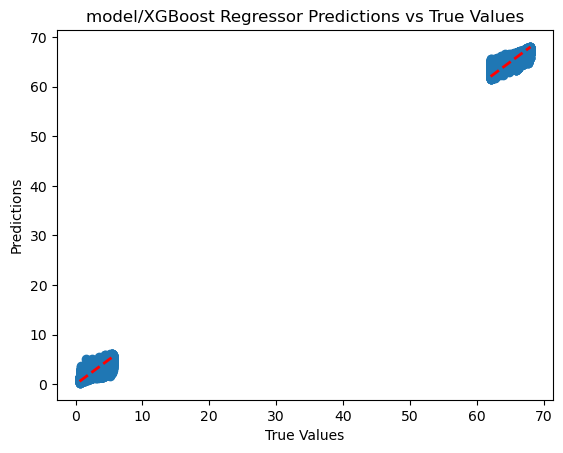

In [26]:
import xgboost as xgb

if os.path.exists('model/XGBoostRegressor_weights.pkl'):
    # Load the model from the pkl file
    regressor = joblib.load('model/XGBoostRegressor_weights.pkl')
    predict = regressor.predict(x_test)
    performance_metrics("model/XGBoost Regressor", predict, y_test)
else:
    # Train the regressor on the training data
    regressor = xgb.XGBRegressor()
    regressor.fit(x_train, y_train)
    # Make predictions on the test data
    predict = regressor.predict(x_test)
    # Save the model weights to a pkl file
    joblib.dump(regressor, 'model/XGBoostRegressor_weights.pkl')
    print("XGBoost Regressor model trained and model weights saved.")
    performance_metrics("XGBoost Regressor", predict, y_test)

## Lasso Regressor

Lasso regressor Mean Squared Error: 1.1130
Lasso regressor Mean Absolute Error: 0.8397
Lasso regressor R^2 Score: 0.1144


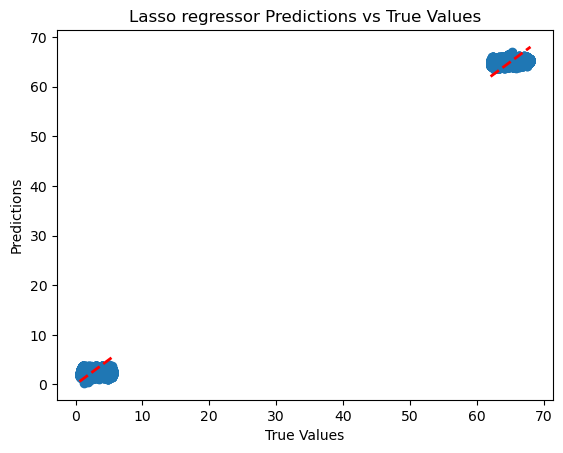

In [27]:
if os.path.exists('model/Lasso_weights.pkl'):
    # Load the model from the pkl file
    Lasso_regressor = joblib.load('model/Lasso_weights.pkl')
else:
    # Train the regressor on the training data
    Lasso_regressor = Lasso(alpha=0.1)  # You can adjust the alpha parameter as needed
    Lasso_regressor.fit(x_train, y_train)
    # Save the model weights to a pkl file
    joblib.dump(Lasso_regressor, 'model/Lasso_weights.pkl')
    
predict = Lasso_regressor.predict(x_test)
performance_metrics("Lasso regressor", predict, y_test)

In [28]:
test_data = resample(x_test, replace=True, n_samples=100, random_state=42)
test_data

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,day,month,year
516776,55.73,14.36,4936.070000,623.152000,401.410000,10.807536,1.751370,299.828,301.554,301.586,...,385.593,801.838277,399.501000,393.840000,391.459,586.665889,412.657,20,7,2017
533781,57.46,10.80,5140.400000,700.763333,403.932659,10.166100,1.702380,250.705,253.329,252.240,...,404.356,391.953000,395.992000,515.162000,505.066,510.652000,492.614,24,7,2017
439480,53.26,16.29,4279.300000,462.036000,402.832000,10.530300,1.660020,298.169,293.774,299.048,...,426.917,463.887000,423.008000,432.422000,441.727,412.763000,372.437,3,7,2017
728557,56.09,15.79,1881.378505,524.534000,417.855176,9.577050,1.674620,299.840,297.158,300.718,...,401.392,490.596000,396.562000,188.841549,361.199,440.423000,342.861,7,9,2017
661982,53.67,19.11,2731.750000,568.848000,380.873000,10.306400,1.720450,300.157,301.957,297.536,...,503.254,480.471000,501.048000,485.632000,407.594,450.343000,392.844,23,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125296,55.17,14.35,2532.260000,360.335000,396.307000,9.435980,1.521894,249.969,249.607,248.751,...,606.571,597.496000,604.654000,263.996000,393.197,390.067000,393.268,21,4,2017
547067,57.46,10.80,3507.880000,558.782000,401.879000,10.624000,1.705480,251.834,302.022,298.676,...,501.388,410.081000,861.592976,420.588000,365.553,420.579000,278.570,27,7,2017
578011,51.34,23.16,3620.460000,362.959000,380.664224,9.828380,1.669300,299.911,295.714,298.313,...,490.935,481.756000,500.506000,492.798000,497.343,434.086000,440.033,4,8,2017
599661,48.81,25.31,2895.820000,328.272000,376.972757,9.956840,1.682930,298.173,297.600,299.336,...,484.120,507.514000,586.056000,343.047000,341.508,331.574000,336.352,9,8,2017


In [29]:
predict = regressor.predict(test_data)
predict

array([[64.69011  ,  2.9913912],
       [65.75426  ,  1.8112793],
       [65.98849  ,  1.2442596],
       [65.901474 ,  1.405364 ],
       [64.56463  ,  2.4422057],
       [64.946266 ,  1.965221 ],
       [64.402985 ,  2.0927627],
       [65.482    ,  1.8841522],
       [65.01315  ,  1.7853022],
       [66.23544  ,  1.9549922],
       [64.553276 ,  1.904693 ],
       [65.12262  ,  2.4596922],
       [65.27757  ,  1.510051 ],
       [65.508965 ,  1.3631018],
       [63.781033 ,  3.486376 ],
       [66.241646 ,  1.8090292],
       [65.76705  ,  2.1137452],
       [62.69957  ,  4.324223 ],
       [65.304016 ,  2.2736855],
       [66.40633  ,  1.4575057],
       [64.97156  ,  2.013543 ],
       [65.066505 ,  2.410685 ],
       [66.04484  ,  1.77615  ],
       [64.25614  ,  3.4584045],
       [65.3136   ,  2.5035007],
       [64.48086  ,  3.1105807],
       [66.284424 ,  1.2899587],
       [66.14989  ,  1.5334985],
       [64.13123  ,  2.6704748],
       [64.914764 ,  2.4941776],
       [66